#**REQUIRED DEPENDENCIES**

In [1]:
import torch
!pip install tools

     |████████████████████████████████| 92kB 7.5MB/s 
  Created wheel for tools: filename=tools-0.1.9-cp37-none-any.whl size=46760 sha256=efe9a3a9424d09e1449972916590c51194f72ce81c2acf97901be0fa78e33792
  Stored in directory: /root/.cache/pip/wheels/87/67/9b/1ca7dcb0b9ebfdc23a00c85a0644abb6fb14f9159a0df8e067
  Created wheel for pytils: filename=pytils-0.3-cp37-none-any.whl size=40356 sha256=4ab67b4e4655b86e0205ca716b17a1d2f79ef9b41a1c48bae8eb520d04f5d764
  Stored in directory: /root/.cache/pip/wheels/d6/f9/dc/4f07d8ee40d9cfca9973b3f4aeff99d0bb69900e5f3dffbf32
Successfully built tools pytils


In [2]:
import tools

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import typing

#**IMAGE ANALYSIS**

In [5]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [6]:
def compute_input(image):
    # should be RGB order
    image = image.astype('float32')
    mean = np.array([0.485, 0.456, 0.406])
    variance = np.array([0.229, 0.224, 0.225])

    image -= mean * 255
    image /= variance * 255
    return image

In [7]:
def invert_input(X):
    X = X.copy()
    mean = np.array([0.485, 0.456, 0.406])
    variance = np.array([0.229, 0.224, 0.225])

    X *= variance * 255
    X += mean * 255
    return X.clip(0, 255).astype('uint8')

In [8]:
def get_gaussian_heatmap(size=512, distanceRatio=3.34):
    v = np.abs(np.linspace(-size / 2, size / 2, num=size))
    x, y = np.meshgrid(v, v)
    g = np.sqrt(x**2 + y**2)
    g *= distanceRatio / (size / 2)
    g = np.exp(-(1 / 2) * (g**2))
    g *= 255
    return g.clip(0, 255).astype('uint8')

#**PRE PROCESSING DATA**

In [9]:
f = open('/content/gdrive/MyDrive/OCR_detection_annotation/0.txt', 'r')

In [10]:
file_contents = f.read()

In [11]:
print (file_contents)

15.025299 79.619064 91.971375 27.37761 111.49409 87.36937 120.44259 144.5673 और
195.26416 345.93964 346.07916 195.40369 296.7271 296.54498 411.9508 412.13293 किस
544.8015 579.83813 541.4978 506.46115 42.720642 60.455795 136.19897 118.46382 दिन
275.59427 311.88095 302.1434 265.85672 134.48518 159.5067 173.62825 148.60674 रूप
30.469978 163.88913 164.9093 31.490135 182.98358 181.51782 274.3758 275.84155 इस
33.57235 184.95844 185.26584 33.879738 354.1837 353.62552 436.9943 437.55246 तरह
-2.6164436 45.761616 53.37768 4.9996223 155.51007 137.70114 158.39023 176.19916 साथ
343.8163 512.32336 512.94495 344.4379 134.2903 132.54332 192.49599 194.24297 एकाएक
337.52948 504.81384 505.13098 337.84662 241.95956 240.91986 291.94846 292.98816 रमानाथ
507.9361 555.0499 523.0799 475.96606 4.7673645 56.682793 85.69593 33.780502 गया



In [12]:
print(file_contents[0:9])

15.025299


In [13]:
with open('/content/gdrive/MyDrive/OCR_detection_annotation/0.txt') as file_in:
    lines = []
   
    i=0
    for line in file_in:
        lines.append(line)
        i = i + 1
        print('Line No ='+str(i)+'\t '+line)

Line No =1	 15.025299 79.619064 91.971375 27.37761 111.49409 87.36937 120.44259 144.5673 और

Line No =2	 195.26416 345.93964 346.07916 195.40369 296.7271 296.54498 411.9508 412.13293 किस

Line No =3	 544.8015 579.83813 541.4978 506.46115 42.720642 60.455795 136.19897 118.46382 दिन

Line No =4	 275.59427 311.88095 302.1434 265.85672 134.48518 159.5067 173.62825 148.60674 रूप

Line No =5	 30.469978 163.88913 164.9093 31.490135 182.98358 181.51782 274.3758 275.84155 इस

Line No =6	 33.57235 184.95844 185.26584 33.879738 354.1837 353.62552 436.9943 437.55246 तरह

Line No =7	 -2.6164436 45.761616 53.37768 4.9996223 155.51007 137.70114 158.39023 176.19916 साथ

Line No =8	 343.8163 512.32336 512.94495 344.4379 134.2903 132.54332 192.49599 194.24297 एकाएक

Line No =9	 337.52948 504.81384 505.13098 337.84662 241.95956 240.91986 291.94846 292.98816 रमानाथ

Line No =10	 507.9361 555.0499 523.0799 475.96606 4.7673645 56.682793 85.69593 33.780502 गया



In [14]:
def create_2d_list(PATH):
  with open(PATH) as fi:
    lines_of_text = []
    for li in fi:
      lines_of_text.append(li.split(' '))

  coordinates = []
  words = []
  for i in lines_of_text:
    coordinates.append(i[:8])
    words.append(i[8:9])
  return coordinates,words


In [15]:
ordinates , ww = create_2d_list('/content/gdrive/MyDrive/OCR_detection_annotation/0.txt')

In [16]:
print(ordinates)

[['15.025299', '79.619064', '91.971375', '27.37761', '111.49409', '87.36937', '120.44259', '144.5673'], ['195.26416', '345.93964', '346.07916', '195.40369', '296.7271', '296.54498', '411.9508', '412.13293'], ['544.8015', '579.83813', '541.4978', '506.46115', '42.720642', '60.455795', '136.19897', '118.46382'], ['275.59427', '311.88095', '302.1434', '265.85672', '134.48518', '159.5067', '173.62825', '148.60674'], ['30.469978', '163.88913', '164.9093', '31.490135', '182.98358', '181.51782', '274.3758', '275.84155'], ['33.57235', '184.95844', '185.26584', '33.879738', '354.1837', '353.62552', '436.9943', '437.55246'], ['-2.6164436', '45.761616', '53.37768', '4.9996223', '155.51007', '137.70114', '158.39023', '176.19916'], ['343.8163', '512.32336', '512.94495', '344.4379', '134.2903', '132.54332', '192.49599', '194.24297'], ['337.52948', '504.81384', '505.13098', '337.84662', '241.95956', '240.91986', '291.94846', '292.98816'], ['507.9361', '555.0499', '523.0799', '475.96606', '4.7673645',

In [17]:
print(ww)

[['और\n'], ['किस\n'], ['दिन\n'], ['रूप\n'], ['इस\n'], ['तरह\n'], ['साथ\n'], ['एकाएक\n'], ['रमानाथ\n'], ['गया\n']]


In [18]:
ground_truth = []
for i in ww:
  for j in i:
    ground_truth.append(j.strip('\n'))

In [19]:
print(ground_truth)

['और', 'किस', 'दिन', 'रूप', 'इस', 'तरह', 'साथ', 'एकाएक', 'रमानाथ', 'गया']


In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame({
    "Co-ordinates" : pd.Series(ordinates),
    "Ground_Truth" : pd.Series(ground_truth)
})

In [22]:
pd.set_option("display.max_columns",100)

In [23]:
df  

,Co-ordinates,Ground_Truth
0,"[15.025299, 79.619064, 91.971375, 27.37761, 11...",और
1,"[195.26416, 345.93964, 346.07916, 195.40369, 2...",किस
2,"[544.8015, 579.83813, 541.4978, 506.46115, 42....",दिन
3,"[275.59427, 311.88095, 302.1434, 265.85672, 13...",रूप
4,"[30.469978, 163.88913, 164.9093, 31.490135, 18...",इस
5,"[33.57235, 184.95844, 185.26584, 33.879738, 35...",तरह
6,"[-2.6164436, 45.761616, 53.37768, 4.9996223, 1...",साथ
7,"[343.8163, 512.32336, 512.94495, 344.4379, 134...",एकाएक
8,"[337.52948, 504.81384, 505.13098, 337.84662, 2...",रमानाथ
9,"[507.9361, 555.0499, 523.0799, 475.96606, 4.76...",गया


In [24]:
structured_data = pd.read_csv('/content/gdrive/MyDrive/data-dir/train/annotations_formatted/1_0.csv')
structured_data.head()

,12,126,67,99,78,137,23,164,और
0,166,337,295,337,295,468,166,468,किस
1,464,48,494,68,462,154,432,134,दिन
2,235,153,266,181,257,197,226,169,रूप
3,26,208,139,206,140,312,26,313,इस
4,28,402,157,402,158,497,28,497,तरह


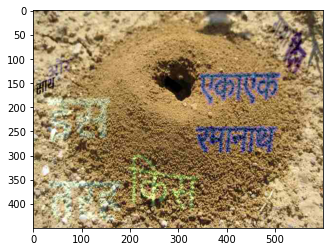

In [25]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('/content/gdrive/MyDrive/OCR_detection/0.jpg') 
  
# Output Images 
plt.imshow(img) 

In [26]:
IMAGE = compute_input(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


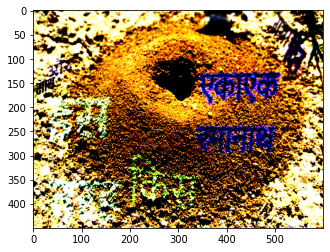

In [27]:
plt.imshow(IMAGE)

In [28]:
from PIL import Image

In [29]:
im = Image.open('/content/gdrive/MyDrive/OCR_detection/0.jpg')

In [30]:
im.save('/content/gdrive/MyDrive/OCR_detection/0_hq.jpg',quality = 100)

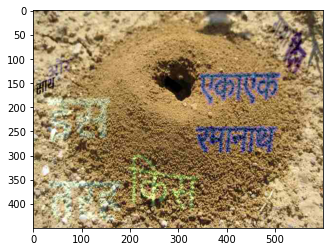

In [31]:
plt.imshow(im)

#**EAST MODEL**


In [32]:
print(tf.version.VERSION)

2.4.1


In [33]:
import tensorflow as tf
import numpy as np

RESIZE_FACTOR = 2

In [34]:
from PIL import Image 
from numpy import asarray 
  
img = Image.open('/content/gdrive/MyDrive/OCR_detection/0_hq.jpg') 
numpydata = asarray(img) 
  
print(type(numpydata)) 

print(numpydata.shape) 

<class 'numpy.ndarray'>
(450, 600, 3)


In [35]:
a = np.array(ordinates)
print(a)

[['15.025299' '79.619064' '91.971375' '27.37761' '111.49409' '87.36937'
  '120.44259' '144.5673']
 ['195.26416' '345.93964' '346.07916' '195.40369' '296.7271' '296.54498'
  '411.9508' '412.13293']
 ['544.8015' '579.83813' '541.4978' '506.46115' '42.720642' '60.455795'
  '136.19897' '118.46382']
 ['275.59427' '311.88095' '302.1434' '265.85672' '134.48518' '159.5067'
  '173.62825' '148.60674']
 ['30.469978' '163.88913' '164.9093' '31.490135' '182.98358' '181.51782'
  '274.3758' '275.84155']
 ['33.57235' '184.95844' '185.26584' '33.879738' '354.1837' '353.62552'
  '436.9943' '437.55246']
 ['-2.6164436' '45.761616' '53.37768' '4.9996223' '155.51007' '137.70114'
  '158.39023' '176.19916']
 ['343.8163' '512.32336' '512.94495' '344.4379' '134.2903' '132.54332'
  '192.49599' '194.24297']
 ['337.52948' '504.81384' '505.13098' '337.84662' '241.95956' '240.91986'
  '291.94846' '292.98816']
 ['507.9361' '555.0499' '523.0799' '475.96606' '4.7673645' '56.682793'
  '85.69593' '33.780502']]


In [36]:
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  return model

In [37]:
MM = create_model()
MM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
#@title Default title text
import os

class Config:

  # user = "srijeyarankesh"
  # lang = "hindi"

    image_size = [512, 512, 3]
    geometry = "QUAD" # ["RBOX", "QUAD"]
    label_method = "single" # ["single", "multiple"]
    use_formatted_data = True
    
    use_slack = False #can be set to true at a later date
    slack_epoch_step = 1
    slack_channel = "#updates" # "CNU04UXUN" 

    max_m_train = 12000
    data_dir = "/content/gdrive/MyDrive/data-dir"
    train_data_dir = os.path.join(data_dir, 'train')
    dev_data_dir = os.path.join(data_dir, 'dev')
    test_data_dir = os.path.join(data_dir, 'test')

    cuda = True
    lambda_score = 1
    lambda_geometry = 1
    epochs = 25
    smoothed_l1_loss_beta = 1.0
    learning_rate = 0.001
    lr_scheduler_step_size = 5000 # for every 2 epochs
    lr_scheduler_gamma = .94
    mini_batch_size = 16
    save_step = 5
    
    experiment_name = "4"
    meta_data_dir = "/content/gdrive/MyDrive/data-dir/experiment_meta_data" # 1
    model_dir = "/content/gdrive/MyDrive/data-dir/experiment_model" # epochs/save_step
    loss_dir = "/content/gdrive/MyDrive/data-dir/experiment_loss" # 1
    plot_dir = "/content/gdrive/MyDrive/data-dir/experiment_plot" # 3
    meta_data_file = os.path.join(meta_data_dir, "experiment_{}.json".format(experiment_name))
    model_file = os.path.join(model_dir, "experiment_" + experiment_name + "_epoch_{}.pth") # format during train
    loss_file = os.path.join(loss_dir, "experiment_{}.csv".format(experiment_name))
    plot_file = os.path.join(plot_dir, "experiment_" + experiment_name + "_{}.png") # format during train             

    meta_data = {"geometry":geometry,
                 "max_m_train":max_m_train,
                 "lambda_score":lambda_score,
                 "lambda_geometry":lambda_geometry,
                 "epochs":epochs, 
                 "smoothed_l1_loss_beta": smoothed_l1_loss_beta,
                 "learning_rate":learning_rate,
                 "lr_scheduler_step_size": lr_scheduler_step_size,
                 "lr_scheduler_gamma": lr_scheduler_gamma,
                 "mini_batch_size":mini_batch_size,
                 "comments": """
                 LR:0.1, 
                 Model: xavier init;
                 Score Loss:  cross entropy with beta; 
                 Geo Loss: L1 loss with text mask normalized by 8*512
                 """
                }
    
    trained_model_file = "/content/gdrive/MyDrive/data-dir/experiment_model/experiment_{}_epoch_{}.pth".format(experiment_name, epochs) 
    
    eval_mini_batch_size = 16
    test_mini_batch_size = 16
    

    score_threshold = 0.7
    nms_method = "iou" # ["overlap", "iou"]
    iou_threshold = 0.05
    max_boxes = 10

In [ ]:

from tqdm import tqdm
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sympy import Polygon, Point
import cv2
#formatting the data
config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

image_size = config['image_size']
geometry = config["geometry"]
label_method = config["label_method"]

train_data_dir = config["train_data_dir"]
dev_data_dir = config["dev_data_dir"]

n_H, n_W, n_C = image_size


def quads_to_rboxes(quads_coords):

    raise NotImplementedError()
    

def load_shapes_coords(annotation_path):

    

    quads_coords = pd.read_csv(annotation_path, header=None)
    quads_coords = quads_coords.iloc[:,:-1].values # [n_box, 8]
    quads_coords = quads_coords.reshape(-1, 4, 2)
    
    if geometry == "QUAD":
        shapes_coords = quads_coords
    elif geometry == "RBOX":
        shapes_coords =  quads_to_rboxes(coords)
    else:
        raise ValueError("Invalid Geometry")
    
    return shapes_coords


representation = geometry + "_" + label_method

print("Formatting data in", representation, "...")
if representation == "QUAD_single":
    
    
    for data_dir in [train_data_dir, dev_data_dir]:
        
        print("Processing", data_dir, "...")
        annotations_dir = os.path.join(data_dir, "annotations_formatted")
        annotations_representation_dir = os.path.join(data_dir, "annotations_formatted_" + representation)
        
        if not os.path.exists(annotations_representation_dir):
            os.mkdir(annotations_representation_dir)
            
        for annotation_file in tqdm(os.listdir(annotations_dir)):
            
            #geometry_map_raw = np.zeros([n_H, n_W, 8])
            geometry_map = np.zeros([128,128, 8])
            
            annotation_path = os.path.join(annotations_dir, annotation_file)
            annotation_representation_path = os.path.join(annotations_representation_dir, annotation_file)
            shapes_coords = load_shapes_coords(annotation_path)
            shapes_centre = shapes_coords.mean(axis=1).astype(np.int32)
            
            for shape_coords, shape_centre in zip(shapes_coords, shapes_centre): # shape_coords -> [4, 2], shape_centre -> [2]
                c_h, c_w = shape_centre
                geometry_map[c_h//4, c_w//4] = shape_coords.flatten() # [8]
            geometry_map = geometry_map.reshape(-1, 8)               
                
            
            
            np.savetxt(annotation_representation_path, geometry_map, fmt="%d", delimiter=",")
        
elif representation == "QUAD_multiple":
    
    for data_dir in [dev_data_dir, train_data_dir]:
        
        print("Processing", data_dir, "...")
        annotations_dir = os.path.join(data_dir, "annotations_formatted")
        annotations_representation_dir = os.path.join(data_dir, "annotations_formatted_" + representation)
        
        if not os.path.exists(annotations_representation_dir):
            os.mkdir(annotations_representation_dir)
            
        for annotation_file in tqdm(os.listdir(annotations_dir)):
            
            
            geometry_map = np.zeros([128,128, 8])
            
            annotation_path = os.path.join(annotations_dir, annotation_file)
            annotation_representation_path = os.path.join(annotations_representation_dir, annotation_file)
            shapes_coords = load_shapes_coords(annotation_path) # [-1, 4, 2]
    
           
            
            for shape_coords in shapes_coords: # shape_coords: [4, 2]
                rough_map = np.zeros([128, 128], dtype="int32") # [128, 128]
                scaled_shape_coords = (shape_coords // 4).astype("int32")# [4, 2]
                cv2.fillPoly(rough_map, [scaled_shape_coords], 1)
                points = np.argwhere(rough_map)
                for (y,x) in points:  # x, y -> image coords
                    shift = shape_coords - np.array([x*4, y*4])
                    shift = shift.flatten().astype("int32")
                    geometry_map[y, x] = shift
                
            
            
            geometry_map = geometry_map.reshape(-1, 8)  

            np.savetxt(annotation_representation_path, geometry_map, fmt="%d", delimiter=",")

else:
    
    raise NotImplementedError()
  

'""\nfrom tqdm import tqdm\nimport os\nimport torch\nimport torch.nn as nn\nimport numpy as np\nimport pandas as pd\nfrom sympy import Polygon, Point\nimport cv2\n#formatting the data\nconfig = {k:v for k,v in vars(Config).items() if not k.startswith("__")}\n\nimage_size = config[\'image_size\']\ngeometry = config["geometry"]\nlabel_method = config["label_method"]\n\ntrain_data_dir = config["train_data_dir"]\ndev_data_dir = config["dev_data_dir"]\n\nn_H, n_W, n_C = image_size\n\n\ndef quads_to_rboxes(quads_coords):\n\n    raise NotImplementedError()\n    \n\ndef load_shapes_coords(annotation_path):\n\n    \n\n    quads_coords = pd.read_csv(annotation_path, header=None)\n    quads_coords = quads_coords.iloc[:,:-1].values # [n_box, 8]\n    quads_coords = quads_coords.reshape(-1, 4, 2)\n    \n    if geometry == "QUAD":\n        shapes_coords = quads_coords\n    elif geometry == "RBOX":\n        shapes_coords =  quads_to_rboxes(coords)\n    else:\n        raise ValueError("Invalid Geometry

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import math

config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

class EAST(nn.Module):


    def __init__(self, geometry="QUAD", label_method="single"):
        super(EAST, self).__init__()

        self.geometry = geometry
        self.label_method = label_method
        self.representation = geometry + "_" + label_method

        ## Feature Extraction Essentials
        # conv1
        self.conv1_1 = nn.Conv2d(3, 64, 3, padding=1)
        self.relu1_1 = nn.ReLU(inplace=True)
        self.conv1_2 = nn.Conv2d(64, 64, 3, padding=1)
        self.relu1_2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/2

        # conv2
        self.conv2_1 = nn.Conv2d(64, 128, 3, padding=1)
        self.relu2_1 = nn.ReLU(inplace=True)
        self.conv2_2 = nn.Conv2d(128, 128, 3, padding=1)
        self.relu2_2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/4

        # conv3
        self.conv3_1 = nn.Conv2d(128, 256, 3, padding=1)
        self.relu3_1 = nn.ReLU(inplace=True)
        self.conv3_2 = nn.Conv2d(256, 256, 3, padding=1)
        self.relu3_2 = nn.ReLU(inplace=True)
        self.conv3_3 = nn.Conv2d(256, 256, 3, padding=1)
        self.relu3_3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/8

        # conv4
        self.conv4_1 = nn.Conv2d(256, 512, 3, padding=1)
        self.relu4_1 = nn.ReLU(inplace=True)
        self.conv4_2 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu4_2 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu4_3 = nn.ReLU(inplace=True)
        self.pool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/16

        # conv5
        self.conv5_1 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu5_1 = nn.ReLU(inplace=True)
        self.conv5_2 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu5_2 = nn.ReLU(inplace=True)
        self.conv5_3 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu5_3 = nn.ReLU(inplace=True)
        self.pool5 = nn.MaxPool2d(2, stride=2, ceil_mode=True) # 1/32


        ## Feature Merging Essentials
        layer1 = nn.Sequential(nn.Conv2d(1024, 256, 1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
                               nn.Conv2d(256, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True))

        layer2 = nn.Sequential(nn.Conv2d(512, 128, 1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
                               nn.Conv2d(128, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True))

        layer3 = nn.Sequential(nn.Conv2d(256, 32, 1), nn.BatchNorm2d(32), nn.ReLU(inplace=True),
                               nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(inplace=True))

        layer4 = nn.Sequential(nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(inplace=True))

        self.feature_convs = nn.ModuleList([layer1, layer2, layer3, layer4])

        self.unpool = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)

        ## Output Layer Essentials
        self.out_score = nn.Sequential(nn.Conv2d(32, 1, 1), nn.Sigmoid())
        if self.representation == "QUAD_single":
            self.out_geo = nn.Sequential(nn.Conv2d(32, 8, 1), nn.Sigmoid())
        elif self.representation == "QUAD_multiple":
            self.out_geo = nn.Sequential(nn.Conv2d(32, 8, 1))
        elif self.representation == "RBOX_single":
            self.out_geo = nn.Sequential(nn.Conv2d(32, 4, 1), nn.Sigmoid())
            self.out_angle = nn.Sequential(nn.Conv2d(32, 1, 1), nn.Sigmoid())

        self._init_weights()

        vgg16 = torchvision.models.vgg16(pretrained=True)

        self.copy_params_from_vgg16(vgg16)

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                torch.nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    m.bias.data.zero_()

    def copy_params_from_vgg16(self, vgg16):
        features = [
            self.conv1_1, self.relu1_1,
            self.conv1_2, self.relu1_2,
            self.pool1,
            self.conv2_1, self.relu2_1,
            self.conv2_2, self.relu2_2,
            self.pool2,
            self.conv3_1, self.relu3_1,
            self.conv3_2, self.relu3_2,
            self.conv3_3, self.relu3_3,
            self.pool3,
            self.conv4_1, self.relu4_1,
            self.conv4_2, self.relu4_2,
            self.conv4_3, self.relu4_3,
            self.pool4,
            self.conv5_1, self.relu5_1,
            self.conv5_2, self.relu5_2,
            self.conv5_3, self.relu5_3,
            self.pool5,
        ]

        for l1, l2 in zip(vgg16.features, features):
            if isinstance(l1, nn.Conv2d) and isinstance(l2, nn.Conv2d):
                assert l1.weight.size() == l2.weight.size()
                assert l1.bias.size() == l2.bias.size()
                l2.weight.data = l1.weight.data
                l2.bias.data = l1.bias.data

    def forward(self, x):
        h = x
        h = self.relu1_1(self.conv1_1(h))
        h = self.relu1_2(self.conv1_2(h))
        h = self.pool1(h)

        h = self.relu2_1(self.conv2_1(h))
        h = self.relu2_2(self.conv2_2(h))
        h = self.pool2(h)
        pool2 = h

        h = self.relu3_1(self.conv3_1(h))
        h = self.relu3_2(self.conv3_2(h))
        h = self.relu3_3(self.conv3_3(h))
        h = self.pool3(h)
        pool3 = h

        h = self.relu4_1(self.conv4_1(h))
        h = self.relu4_2(self.conv4_2(h))
        h = self.relu4_3(self.conv4_3(h))
        h = self.pool4(h)
        pool4 = h

        h = self.relu5_1(self.conv5_1(h))
        h = self.relu5_2(self.conv5_2(h))
        h = self.relu5_3(self.conv5_3(h))
        h = self.pool5(h)
        pool5 = h


        f = [pool5, pool4, pool3, pool2]
        g = [None, None, None, None]
        h = [None, None, None, None]

        for i in range(4):

            if i == 0:
                h[i] = f[i]
            else:
                concat = torch.cat([g[i - 1], f[i]], dim=1)
                h[i] = self.feature_convs[i - 1](concat)

            if i <= 2:
                g[i] = self.unpool(h[i])
            else:
                g[i] = self.feature_convs[i](h[i])


        score_map = self.out_score(g[3])
        geo_map = self.out_geo(g[3])
        if self.representation == "QUAD_single":
            geometry_map = geo_map * 512
        elif self.representation == "QUAD_multiple":
            geometry_map = geo_map
        elif self.representation == "RBOX_single":
            angle_map = self.out_angle(g[3])
            angle_map = (angle_map - 0.5) * math.pi / 2
            geometry_map = torch.cat((geo_map, angle_map), dim=1)

        #print("pool1", pool5.size())
        #print("h1", h[0].size())
        #print("g1", g[0].size())

        return score_map, geometry_map


In [44]:
from tqdm import tqdm
import time
#dataset manipulation
config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

image_size = config['image_size']
geometry = config['geometry']
label_method = config['label_method']
use_formatted_data = config['use_formatted_data']

max_m_train = config['max_m_train']

representation = geometry + "_"+ label_method

n_H, n_W, n_C = image_size

if geometry == "RBOX":
    raise NotImplementedError("Only implemented for the QUAD geometry")
if label_method == "multiple":
    raise NotImplementedError("Only implemented for the single label method")


def list_images(images_dir, store=False):
 
    names = list(os.listdir(images_dir))
    image_names = names[:max_m_train]
    np.random.shuffle(image_names)    

    if store:
        data_dir = "/".join(images_dir.split("/")[:-1])
        file = os.path.join(data_dir, 'train_image_names.csv')
        with open(file, 'w', newline='') as myfile:
            wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
            wr.writerow(image_names)
 
    return image_names


def quads_to_rboxes(quads_coords):

    raise NotImplementedError()


def load_shapes_coords(annotation_path):

    """
    > correct the order of the coords of a quad
    """

    quads_coords = pd.read_csv(annotation_path, header=None)
    quads_coords = quads_coords.iloc[:,:-1].values # [n_box, 8]
    quads_coords = quads_coords.reshape(-1, 4, 2)
    
    if geometry == "QUAD":
        shapes_coords = quads_coords
    elif geometry == "RBOX":
        shapes_coords =  quads_to_rboxes(coords)
    else:
        raise ValueError("Invalid Geometry")
    
    return shapes_coords


def load_image(image_path):

    image = cv2.imread(image_path)
    image = image[:, :, ::-1] # BGR to RGB
    image = image.astype(np.float32)
    image = np.moveaxis(image, 2, 0) # channel_last to channel_first
    return image


def load_score_and_geometry_map_raw(annotation_path):

    shapes_coords = load_shapes_coords(annotation_path)
    score_map = np.zeros([1, 128, 128])
    geometry_map = np.zeros([8, 128, 128])
    score_map_raw = np.zeros([n_H, n_W, 1])
    geometry_map_raw = np.zeros([n_H, n_W, 8])
    
    if representation == "QUAD_single":
            
        shapes_centre = np.mean(shapes_coords, axis=1).astype(np.int32)
        #print("shapes_coords", shapes_coords.shape, "\n", shapes_coords)
        #print("shapes_centre", shapes_centre.shape, "\n", shapes_centre)
        for shape_coords, shape_centre in zip(shapes_coords, shapes_centre): # shape_coords -> [4, 2], shape_centre -> [2]
            c_h, c_w = shape_centre
            score_map_raw[c_h, c_w, 0] = 1
            geometry_map_raw[c_h, c_w] = shape_coords.flatten() # [8]

        score_map_raw = np.moveaxis(score_map_raw, 2, 0) # channel_last to channel_first
        geometry_map_raw = np.moveaxis(geometry_map_raw, 2, 0) # channel_last to channel_first

        max_pool_2d = nn.MaxPool2d((4,4), stride=4)
        score_map_raw = torch.from_numpy(score_map_raw)
        score_map = max_pool_2d(score_map_raw)
        geometry_map_raw = torch.from_numpy(geometry_map_raw)
        geometry_map = max_pool_2d(geometry_map_raw)

        #print("score_map", score_map.shape, "\n", score_map.sum())
        #print("geometry_map", geometry_map.shape, "\n", (geometry_map.sum(axis=0)>0).sum())
        #time.sleep(10)
                                       
    elif representation == "QUAD_multiple":
        
        raise NotImplementedError()
        
    elif representation == "RBOX_single":
        
        raise NotImplementedError()
        
    elif representation == "RBOX_multiple":
        
        raise NotImplementedError()
            
    else:
        
        raise ValueError("Invalid representation: " + representation)

    assert score_map.shape == (1, 128, 128)
    assert geometry_map.shape == (8, 128, 128)
    
    return score_map, geometry_map


def load_score_and_geometry_map_formatted(annotation_path):
    
    score_map = np.zeros([1, 128, 128])
    geometry_map = np.zeros([8, 128, 128])
    
    if representation == "QUAD_single" or representation == "QUAD_multiple":
        
        geometry_map = pd.read_csv(annotation_path, header=None).values # [(128*128), 8]
        geometry_map = geometry_map.reshape(128, 128, 8)
        geometry_map = np.moveaxis(geometry_map, 2, 0)
        score_map = (geometry_map.sum(axis=0) > 0).astype(np.int).reshape(1, 128, 128)
        
    elif representation == "RBOX_single":
        
        raise NotImplementedError()
        
    elif representation == "RBOX_multiple":
        
        raise NotImplementedError()
            
    else:
        
        raise ValueError("Invalid representation: " + representation)
        
    assert score_map.shape == (1, 128, 128)
    assert geometry_map.shape == (8, 128, 128)
    
    return score_map, geometry_map
    

class ImageDataSet(torch.utils.data.Dataset):

    def __init__(self, images_dir, annotations_dir):

        self.images_dir = images_dir
        self.annotations_dir = annotations_dir 
        self.image_names = list_images(images_dir, store=True)

    def __getitem__(self, index):

        image_name = self.image_names[index]
        image_path = os.path.join(self.images_dir, image_name)
        image = load_image(image_path) # image -> [3, 512, 512]
        
        annotation_name = image_name.split(".")[0] + ".csv"
        annotation_path = os.path.join(self.annotations_dir, annotation_name)
        
        if use_formatted_data:
            score_map, geometry_map = load_score_and_geometry_map_formatted(annotation_path) # score_map -> [1, 128, 128]; geometry_map -> [8, 128, 128]
        else:
            score_map, geometry_map = load_score_and_geometry_map_raw(annotation_path) # score_map -> [1, 128, 128]; geometry_map -> [8, 128, 128]
        
        return image_name, image, score_map, geometry_map

    def __len__(self):
        
        return len(self.image_names)
    
    
class ImageTestDataSet(torch.utils.data.Dataset):

    def __init__(self, images_dir):

        self.images_dir = images_dir
        self.image_names = list_images(images_dir, store=False)

    def __getitem__(self, index):

        image_name = self.image_names[index]
        image_path = os.path.join(self.images_dir, image_name)
        # image -> [3, 512, 512]
        image = load_image(image_path)             
        
        return image_name, image

    def __len__(self):
        
        return len(self.image_names)


In [45]:

import torch
import torch.nn as nn
import torch.nn.functional as F

config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}
geometry = config['geometry']
label_method = config['label_method']
image_size = config['image_size']
n_H, n_W, n_C = image_size
lambda_score = config['lambda_score']
lambda_geometry = config['lambda_geometry']

if geometry == "RBOX":
    raise NotImplementedError("Only implemented for the QUAD geometry")
if label_method == "multiple":
    raise NotImplementedError("Only implemented for the single label method")

class LossFunction(nn.Module):

    def __init__(self):

        super(LossFunction, self).__init__()
        self.loss_of_score = None
        self.loss_of_geometry = None
        self.loss = None


    def compute_geometry_beta(self, y_true_geometry_cell):

        D = []
        for i in range(0, 8, 2): # 0,2,4,6
            indices = [i, i+1, (i+2)%8, (i+3)%8]
            x1, y1, x2, y2 = y_true_geometry_cell[indices]
            d = (x1 - x2) ** 2 + (y1 - y2) ** 2
            D.append(d)
        D = torch.Tensor(D)

        return torch.sqrt(torch.min(D))


    def compute_score_loss(self, Y_true_score, Y_pred_score):

        
        m = Y_true_score.shape[0]
        n_cells = torch.numel(Y_true_score)
        n_pos_cells = Y_true_score.sum()
        n_neg_cells = n_cells - n_pos_cells
        beta = 1 - (Y_true_score.sum()/torch.numel(Y_true_score)) # ratio of 0s
        loss_of_score_pos = -beta * Y_true_score * torch.log(Y_pred_score) # [m, 1, 128, 128]
        loss_of_score_neg = -(1 - beta) * (1 - Y_true_score) * torch.log(1 - Y_pred_score) # [m, 1, 128, 128]
        normalization_factor = (beta * n_pos_cells) + ((1-beta)* n_neg_cells)
        loss_of_score = torch.sum(loss_of_score_pos + loss_of_score_neg) / normalization_factor

        return loss_of_score


    def compute_geometry_loss(self, Y_true_geometry, Y_pred_geometry, Y_true_score, smoothed_l1_loss_beta=1):

        
        beta = smoothed_l1_loss_beta
        diff = torch.abs(Y_true_geometry*Y_true_score - Y_pred_geometry*Y_true_score) # multiply with text mask
        diff = diff / 512
        #diff = torch.where(diff < beta, 0.5 * diff ** 2 / beta, diff - 0.5 * beta)
        loss_of_geometry = diff.sum()
        loss_of_geometry /= float(Y_true_score.sum()*8)

        return loss_of_geometry



    def compute_loss(self, Y_true_score, Y_pred_score, Y_true_geometry, Y_pred_geometry, smoothed_l1_loss_beta=1):
        
        #print("Y_true_geometry.max():", torch.max(Y_true_geometry).item())
        #print("Y_pred_geometry.max():", torch.max(Y_pred_geometry).item())
        self.loss_of_score = self.compute_score_loss(Y_true_score, Y_pred_score)
        self.loss_of_geometry = self.compute_geometry_loss(Y_true_geometry, 
                                                           Y_pred_geometry, 
                                                           Y_true_score, 
                                                           smoothed_l1_loss_beta=smoothed_l1_loss_beta)
        self.loss = lambda_score * self.loss_of_score + lambda_geometry * self.loss_of_geometry
        return self.loss

In [46]:
import torch
import numpy as np
import cv2
from sympy import Polygon
from sympy.geometry import intersection
from tqdm import tqdm

config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

score_threshold = config['score_threshold']
nms_method = config['nms_method']
iou_threshold = config['iou_threshold']
max_boxes = config['max_boxes']


def compute_iou_using_sympy(gmap_a, gmap_b):
    
    gmap_a = [(x, y) for x, y in gmap_a.reshape(-1, 2)]
    gmap_b = [(x, y) for x, y in gmap_b.reshape(-1, 2)]
     
    poly_a = Polygon(*gmap_a)
    poly_b = Polygon(*gmap_b)
    
    #print([map(sympy.Float, p) for p in poly_a.vertices])
    #print([map(sumpy.Float, p) for p in poly_b.vertices])

    intersection_ = intersection(poly_a, poly_b)
    #print(intersection_)
    #print([tuple(p) for p in intersection_.vertices])
    area_int = np.abs(np.float(intersection(poly_a, poly_b)))
    area_un = np.abs(np.float(poly_a.area)) + np.abs(np.float(poly_b.area)) + area_int + 10e-6
    iou = area_int/area_un
    
    return iou


def compute_iou_using_cv2(gmap_a, gmap_b):
    
    gmap_a = gmap_a.reshape(-1, 2).astype(np.int32)
    gmap_b = gmap_b.reshape(-1, 2).astype(np.int32)
     
    ref_map_a = np.zeros(shape=(512, 512))
    ref_map_b = np.zeros_like(ref_map_a)
    ref_map_un = np.zeros_like(ref_map_a)

    cv2.fillPoly(ref_map_a, [gmap_a], 1)
    cv2.fillPoly(ref_map_b, [gmap_b], 1)
    cv2.fillPoly(ref_map_un, [gmap_a, gmap_b], 1)

    area_a = ref_map_a.sum()
    area_b = ref_map_b.sum()
    area_un = ref_map_un.sum()
    area_int = area_a + area_b - area_un
    iou = area_int/area_un
    
    #print(area_a, area_b, area_un, area_int, iou)
    
    return iou


def check_overlap(gmap_a, gmap_b):

    gmap_a = [(x, y) for x, y in gmap_a.reshape(-1, 2)]
    gmap_b = [(x, y) for x, y in gmap_b.reshape(-1, 2)]
     
    poly_a = Polygon(*gmap_a)
    poly_b = Polygon(*gmap_b)

    for point in poly_a.vertices:
        if poly_b.encloses(point):
            return 1

    return -1


if nms_method == "iou":
    filter_function = compute_iou_using_cv2
    max_threshold = iou_threshold
elif nms_method == "overlap":
    filter_function = check_overlap
    max_threshold = 0

def non_maximal_supression(score_maps_pred, geometry_maps_pred, score_threshold=0.7, iou_threshold=0.4, max_boxes=10):
    
    mini_batch_boxes_pred = []
    for score_map_pred, geometry_map_pred in zip(score_maps_pred, geometry_maps_pred): 
        # score_map_pred: [1, 128, 128]; geometry_map_pred: [8, 128, 128]
        
        score_mask = score_map_pred > score_threshold # [1, 128, 128]
        #print(score_mask)
        score_mask_repeat = np.repeat(score_mask, 8, axis=0) # [8, 128, 128]
        #print(score_mask_repeat)
        
        score_map_pred_selected = score_map_pred[score_mask] # [sel]
        #print()
        #print(score_map_pred_selected.shape)
        #print(score_map_pred_selected)
        selection_order = np.argsort(score_map_pred_selected)[::-1] # [sel]
        #print(selection_order)
        
        geometry_map_pred_selected = geometry_map_pred[score_mask_repeat].reshape(8, -1).T # [-1, 8]
        #print()
        #print(geometry_map_pred_selected.shape)
        #print(geometry_map_pred_selected)
        geometry_map_pred_selected = geometry_map_pred_selected[selection_order] # [-1, 8]
        #print(geometry_map_pred_selected)
        
        if len(geometry_map_pred_selected):
            geometry_map_pred_filtered = [geometry_map_pred_selected[0]]
            for gmap1 in geometry_map_pred_selected[1:]: # hiring

                hired = True
                for gmap2 in geometry_map_pred_filtered: # Existing

                    val = filter_function(gmap1, gmap2)
                    if val >= max_threshold:
                        hired = False
                        break

                if hired == True:
                    geometry_map_pred_filtered.append(gmap1)
                    if len(geometry_map_pred_filtered) >= max_boxes:
                        break

            #geometry_map_pred_filtered = geometry_map_pred_filtered[:max_boxes]
            mini_batch_boxes_pred.append(np.array(geometry_map_pred_filtered).astype(np.int).tolist())
    
    return mini_batch_boxes_pred


def send_message(slack_client, channel, message): 
    
    response = slack_client.chat_postMessage(
        channel=channel,
        text=message,
        username='Deep Updater',
        icon_emoji=':robot_face:')
    
    return response


def send_picture(slack_client, channel, title, picture, message=""): 
    
    response = slack_client.files_upload(
        channels=channel,
        title=title,
        file=picture,
        message=message,
        username='Deep Updater',
        icon_emoji=':robot_face:')
    
    return response


def draw_bbs(image, bbs, color=(0, 0, 255), thickness=1): # BGR
    
    for bb in bbs:
        
        image = cv2.line(image, (bb[0],bb[1]), (bb[2],bb[3]), color, thickness=thickness)
        image = cv2.line(image, (bb[2],bb[3]), (bb[4],bb[5]), color, thickness=thickness)
        image = cv2.line(image, (bb[4],bb[5]), (bb[6],bb[7]), color, thickness=thickness)
        image = cv2.line(image, (bb[6],bb[7]), (bb[0],bb[1]), color, thickness=thickness)
        
    return image


def reverse_shift(geometry_maps_pred): # [8, 128, 128]

	geometry_maps_pred = np.moveaxis(geometry_maps_pred, 0, 2) # [128, 128, 8]
	geometry_maps_pred = geometry_maps_pred.reshape(128, 128, 4, 2)

	for i in range(128):
		for j in range(128):
			geometry_maps_pred[i, j] = geometry_maps_pred[i, j] + np.array([4*i, 4*j])

	geometry_maps_pred = geometry_maps_pred.reshape(128, 128, 8)
	geometry_maps_pred = np.moveaxis(geometry_maps_pred, 2, 0) # [8, 128, 128]

	return geometry_maps_pred

In [47]:
print(torch.cuda.is_available())

True


In [48]:
print(torch.cuda.get_device_name())

Tesla T4


#*TRAINING*

Number of examples: 4703
Mini batch size: 24
Number of epochs: 25
Number of mini batches: 196


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:1/25  ScoreLoss:0.694128  GeometryLoss:0.259034  Loss:0.953162  Duration:00:44:13


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:2/25  ScoreLoss:0.651697  GeometryLoss:0.240149  Loss:0.891846  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:3/25  ScoreLoss:0.631346  GeometryLoss:0.231576  Loss:0.862923  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:4/25  ScoreLoss:0.597821  GeometryLoss:0.212267  Loss:0.810089  Duration:00:05:15


Training Mini Batches:: 100%|██████████| 196/196 [05:15<00:00,  1.61s/it]


Epoch:5/25  ScoreLoss:0.551860  GeometryLoss:0.163917  Loss:0.715777  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:6/25  ScoreLoss:0.491196  GeometryLoss:0.138811  Loss:0.630007  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:7/25  ScoreLoss:0.429672  GeometryLoss:0.121850  Loss:0.551522  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:8/25  ScoreLoss:0.365336  GeometryLoss:0.100828  Loss:0.466164  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:9/25  ScoreLoss:0.325336  GeometryLoss:0.076295  Loss:0.401631  Duration:00:05:15


Training Mini Batches:: 100%|██████████| 196/196 [05:15<00:00,  1.61s/it]


Epoch:10/25  ScoreLoss:0.292768  GeometryLoss:0.067110  Loss:0.359878  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:11/25  ScoreLoss:0.256572  GeometryLoss:0.059962  Loss:0.316534  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:12/25  ScoreLoss:0.231020  GeometryLoss:0.055758  Loss:0.286779  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:13/25  ScoreLoss:0.220320  GeometryLoss:0.053479  Loss:0.273799  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:14/25  ScoreLoss:0.206510  GeometryLoss:0.050701  Loss:0.257211  Duration:00:05:15


Training Mini Batches:: 100%|██████████| 196/196 [05:15<00:00,  1.61s/it]


Epoch:15/25  ScoreLoss:0.193951  GeometryLoss:0.048620  Loss:0.242571  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:16/25  ScoreLoss:0.187985  GeometryLoss:0.047325  Loss:0.235310  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:17/25  ScoreLoss:0.181847  GeometryLoss:0.046287  Loss:0.228134  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:18/25  ScoreLoss:0.171940  GeometryLoss:0.044627  Loss:0.216567  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:19/25  ScoreLoss:0.163120  GeometryLoss:0.043324  Loss:0.206444  Duration:00:05:15


Training Mini Batches:: 100%|██████████| 196/196 [05:15<00:00,  1.61s/it]


Epoch:20/25  ScoreLoss:0.163079  GeometryLoss:0.043754  Loss:0.206833  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:21/25  ScoreLoss:0.153779  GeometryLoss:0.042217  Loss:0.195996  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:22/25  ScoreLoss:0.148690  GeometryLoss:0.040983  Loss:0.189673  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:23/25  ScoreLoss:0.145180  GeometryLoss:0.040520  Loss:0.185699  Duration:00:05:15


Training Mini Batches::   0%|          | 0/196 [00:00<?, ?it/s]

Epoch:24/25  ScoreLoss:0.147149  GeometryLoss:0.041028  Loss:0.188177  Duration:00:05:16


Training Mini Batches:: 100%|██████████| 196/196 [05:15<00:00,  1.61s/it]


Epoch:25/25  ScoreLoss:0.142812  GeometryLoss:0.040770  Loss:0.183582  Duration:00:05:15


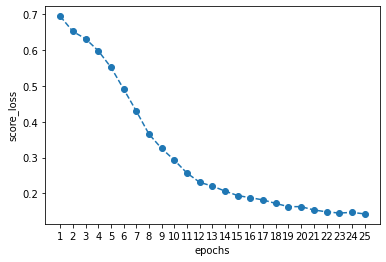

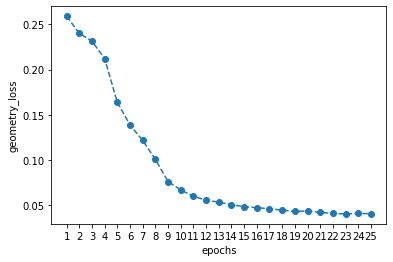

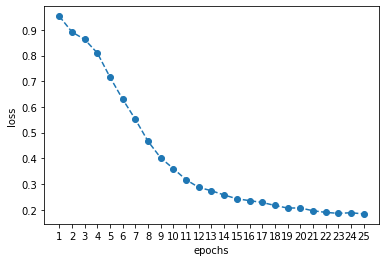

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import os 
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import csv
import json
import math
#from slack import WebClient


config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

geometry = config["geometry"]
label_method = config['label_method']
use_formatted_data = config['use_formatted_data']

use_slack = config["use_slack"]
slack_epoch_step = config["slack_epoch_step"]
slack_channel = config["slack_channel"]

train_data_dir = config["train_data_dir"]

cuda = config["cuda"]
lambda_geometry = config["lambda_geometry"]
epochs = config["epochs"]
smoothed_l1_loss_beta = config["smoothed_l1_loss_beta"]
learning_rate = config["learning_rate"]
lr_scheduler_step_size = config['lr_scheduler_step_size']
lr_scheduler_gamma = config['lr_scheduler_gamma']
mini_batch_size = config["mini_batch_size"]
save_step = config["save_step"]

experiment_name = config["experiment_name"]
meta_data_dir = config["meta_data_dir"]
model_dir = config["model_dir"]
loss_dir = config["loss_dir"]
plot_dir = config["plot_dir"]
meta_data_file = config["meta_data_file"]
model_file = config["model_file"]
loss_file = config["loss_file"]
plot_file = config["plot_file"]
meta_data = config["meta_data"]

representation = geometry + "_" + label_method

if use_slack and os.environ['SLACK_TOKEN']:
    slack_client = WebClient(os.environ.get('SLACK_TOKEN'))

for dir_ in [meta_data_dir, model_dir, loss_dir, plot_dir]:   
    if not os.path.exists(dir_):
        os.mkdir(dir_)
                 
with open(meta_data_file, 'w') as file:
    json.dump(meta_data, file)
with open(loss_file, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['epoch_number', 'mini_batch_number', 'score_loss', 'geometry_loss', 'loss'])
    
if use_slack:
    message = "Experiment {} started!".format(experiment_name)
    send_message(slack_client, slack_channel, message)
    message = str(meta_data)
    send_message(slack_client, slack_channel, message)
    
train_images_dir = os.path.join(train_data_dir, "images_formatted")
train_annotations_dir = os.path.join(train_data_dir, "annotations_formatted")
if use_formatted_data:
    train_annotations_dir = train_annotations_dir + "_" + representation

trainset = ImageDataSet(train_images_dir, train_annotations_dir)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=mini_batch_size, shuffle=True)

n_mini_batches = math.ceil(len(trainset)/mini_batch_size)
print("Number of examples:", len(trainset))
print("Mini batch size:", mini_batch_size)
print("Number of epochs:", epochs)
print("Number of mini batches:", n_mini_batches) 


model = EAST(geometry=geometry, label_method=label_method)
model = model.train()
loss_function = LossFunction()
if cuda:
    model.cuda()
    loss_function.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_scheduler_step_size, gamma=lr_scheduler_gamma)

losses = []
score_losses = []
geometry_losses = []
with torch.autograd.set_detect_anomaly(True):
    for e in range(1, epochs+1):
        epoch_loss = 0
        epoch_score_loss = 0
        epoch_geometry_loss = 0

        tic = time.time()
        for i, train_egs in tqdm(enumerate(train_loader, start=1), total=n_mini_batches, desc="Training Mini Batches:"):
            optimizer.zero_grad()

            image_names, images, score_maps, geometry_maps = train_egs  
            if cuda:
                images = Variable(images.cuda())
                score_maps = Variable(score_maps.cuda())
                geometry_maps = Variable(geometry_maps.cuda())
            #print("images", images.size())
            #print("score_maps", score_maps.size(), "geometry_maps", geometry_maps.size())

            score_maps_pred, geometry_maps_pred = model.forward(images)
            #print("score_maps_pred", score_maps_pred.size(), "geometry_maps_pred", geometry_maps_pred.size())

            mini_batch_loss = loss_function.compute_loss(score_maps.double(), 
                score_maps_pred.double(),
                geometry_maps.double(), 
                geometry_maps_pred.double(),
                smoothed_l1_loss_beta = smoothed_l1_loss_beta)
            
            mini_batch_loss_of_score_item = loss_function.loss_of_score.item()
            mini_batch_loss_of_geometry_item = loss_function.loss_of_geometry.item()
            mini_batch_loss_item = mini_batch_loss.item()
            with open(loss_file, 'a') as file:
                writer = csv.writer(file)
                writer.writerow([e, i, mini_batch_loss_of_score_item, mini_batch_loss_of_geometry_item, mini_batch_loss_item])
            #print("Score Loss:", mini_batch_loss_of_score_item)
            #print("Geometry Loss:", mini_batch_loss_of_geometry_item)
            #print("Loss:", mini_batch_loss_item)

            epoch_score_loss += mini_batch_loss_of_score_item
            epoch_geometry_loss += mini_batch_loss_of_geometry_item
            epoch_loss += mini_batch_loss_item

            mini_batch_loss.backward()
            optimizer.step()
            scheduler.step()

        epoch_loss /= n_mini_batches
        epoch_score_loss /= n_mini_batches
        epoch_geometry_loss /= n_mini_batches
        losses.append(epoch_loss)
        score_losses.append(epoch_score_loss)
        geometry_losses.append(epoch_geometry_loss)
        toc = time.time()
        elapsed_time = toc - tic
        message = "Epoch:{}/{}  ScoreLoss:{:.6f}  GeometryLoss:{:.6f}  Loss:{:.6f}  Duration:{}".format(
            e, 
            epochs,
            epoch_score_loss, 
            epoch_geometry_loss,
            epoch_loss, 
            time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
        print(message)

        if e % save_step == 0:
            torch.save(model.state_dict(), model_file.format(str(e)))
            keep_n = 1
            file_to_delete = model_file.format(str(e-(keep_n*save_step)))
            if os.path.exists(file_to_delete):
                os.remove(file_to_delete)
                
        if use_slack and e % slack_epoch_step == 0:
            send_message(slack_client, slack_channel, message)
    
    loss_type = "score_loss"
    plt.figure()
    plt.plot(range(1, epochs+1), score_losses, marker="o", linestyle="--")
    plt.xticks(range(1, epochs+1))
    plt.xlabel("epochs")
    plt.ylabel(loss_type)
    plt.savefig(plot_file.format(loss_type))
    if use_slack:
        send_picture(slack_client, slack_channel, loss_type, plot_file.format(loss_type))

    loss_type = "geometry_loss"
    plt.figure()
    plt.plot(range(1, epochs+1), geometry_losses, marker="o", linestyle="--")
    plt.xticks(range(1, epochs+1))
    plt.xlabel("epochs")
    plt.ylabel(loss_type)
    plt.savefig(plot_file.format(loss_type))
    if use_slack:
        send_picture(slack_client, slack_channel, loss_type, plot_file.format(loss_type))
        
    loss_type = "loss"
    plt.figure()
    plt.plot(range(1, epochs+1), losses, marker="o", linestyle="--")
    plt.xticks(range(1, epochs+1))
    plt.xlabel("epochs")
    plt.ylabel(loss_type)
    plt.savefig(plot_file.format(loss_type))
    if use_slack:
        send_picture(slack_client, slack_channel, loss_type, plot_file.format(loss_type))
        send_message(slack_client, slack_channel, message=":tada: "*5)

#*Trained Model Weights*

In [49]:
Model = torch.load('/content/gdrive/MyDrive/data-dir/experiment_model/experiment_1_epoch_5.pth')

In [50]:
print(Model)

OrderedDict([('conv1_1.weight', tensor([[[[-0.5557,  0.1377,  0.5270],
          [-0.5824,  0.3512,  0.7621],
          [-0.6912, -0.0550,  0.4794]],

         [[ 0.1770,  0.0054, -0.0860],
          [ 0.0496, -0.0746, -0.2662],
          [ 0.1374, -0.1774, -0.1379]],

         [[ 0.3207, -0.1701, -0.4370],
          [ 0.4880, -0.0854, -0.4963],
          [ 0.6465,  0.0183, -0.2843]]],


        [[[ 0.2317,  0.1218,  0.1769],
          [-0.4353, -0.2522,  0.2328],
          [-0.2583,  0.1358, -0.0165]],

         [[-0.1299, -0.2128,  0.1527],
          [-0.8357, -0.3485,  0.5623],
          [-0.2362,  0.5254,  0.5400]],

         [[-0.3149, -0.3747, -0.1375],
          [-0.4779, -0.1606,  0.3363],
          [ 0.0501,  0.5857,  0.4905]]],


        [[[ 0.1811,  0.5150,  0.0064],
          [-0.2685, -0.7292,  0.3061],
          [-0.0764, -0.2268,  0.3294]],

         [[ 0.3242,  0.6710,  0.0225],
          [-0.4516, -1.0762,  0.3347],
          [-0.0669, -0.3014,  0.5481]],

         [[ 

#*Evaluate Model*

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import math
import cv2

do_eval_trainset = False
do_eval_devset = True

config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

geometry = config['geometry']
label_method = config['label_method']
use_formatted_data = config['use_formatted_data']

train_data_dir = config['train_data_dir']
dev_data_dir = config['dev_data_dir']

cuda = config['cuda']
smoothed_l1_loss_beta = config["smoothed_l1_loss_beta"]

trained_model_file = config['trained_model_file']
eval_mini_batch_size = config['eval_mini_batch_size']

score_threshold = config['score_threshold']
iou_threshold = config['iou_threshold']
max_boxes = config['max_boxes']

representation = geometry + "_" + label_method

model = EAST(geometry=geometry)
loss_function = LossFunction()
if cuda:
    model.cuda()
    loss_function.cuda()
model.load_state_dict(torch.load(trained_model_file))
model.eval()
def eval_dataset(data_dir):
    
    data_images_dir = os.path.join(data_dir, "images_formatted")
    data_annotations_dir = os.path.join(data_dir, "annotations_formatted")
    if use_formatted_data:
        data_annotations_formatted_dir = data_annotations_dir + "_" + representation
    data_images_pred_dir = os.path.join(data_dir, "images_pred")
    data_annotations_pred_dir = os.path.join(data_dir, "annotations_pred")
    
    if not os.path.exists(data_images_pred_dir):
        os.mkdir(data_images_pred_dir)
    if not os.path.exists(data_annotations_pred_dir):
        os.mkdir(data_annotations_pred_dir)
    
    dataset = ImageDataSet(data_images_dir, data_annotations_formatted_dir)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=eval_mini_batch_size, shuffle=True)

    score_loss, geometry_loss, loss = 0, 0, 0
    boxes_pred = []
    n_mini_batches = math.ceil(len(dataset)/eval_mini_batch_size)
    for i, data_egs in tqdm(enumerate(data_loader, start=1), total=n_mini_batches, desc="Evaluating Mini Batches:"):
        
        image_names, images, score_maps, geometry_maps = data_egs
        if cuda:
            images = images.cuda()
            score_maps = score_maps.cuda()
            geometry_maps = geometry_maps.cuda()
            
        score_maps_pred, geometry_maps_pred = model.forward(images)
  
        mini_batch_loss = loss_function.compute_loss(score_maps.double(), 
            score_maps_pred.double(),
            geometry_maps.double(), 
            geometry_maps_pred.double(),
            smoothed_l1_loss_beta = smoothed_l1_loss_beta)

        mini_batch_loss_of_score_item = loss_function.loss_of_score.item()
        mini_batch_loss_of_geometry_item = loss_function.loss_of_geometry.item()
        mini_batch_loss_item = mini_batch_loss.item()
              
        score_loss += mini_batch_loss_of_score_item
        geometry_loss += mini_batch_loss_of_geometry_item
        loss += mini_batch_loss_item
        
        score_maps_pred = score_maps_pred.cpu().numpy()
        geometry_maps_pred = geometry_maps_pred.cpu().numpy()

        if representation == "QUAD_multiple":
        	geometry_maps_pred = reverse_shift(geometry_maps_pred) # [8, 128, 128]

        #print("NMS Started")
        nms_tic = time.time()
        
        mini_batch_boxes_pred = non_maximal_supression(score_maps_pred, 
                                                       geometry_maps_pred, 
                                                       score_threshold=score_threshold, 
                                                       iou_threshold=iou_threshold, 
                                                       max_boxes=max_boxes)

        
        nms_toc = time.time()
        elapsed_time = time.strftime("%H:%M:%S", time.gmtime(nms_toc - nms_tic))
        #print("NMS Ended", "Duration", toc-tic)

        boxes_pred.extend(mini_batch_boxes_pred)
        
        for image_name, eg_boxes_pred in zip(image_names, mini_batch_boxes_pred):

            annotation_name = image_name.split(".")[0] + ".csv"
            image_path = os.path.join(data_images_dir, image_name)
            annotation_path = os.path.join(data_annotations_dir, annotation_name)
            image_pred_path = os.path.join(data_images_pred_dir, image_name)
            annotation_pred_path = os.path.join(data_annotations_pred_dir, annotation_name)
            
            image = cv2.imread(image_path)
            geometry_map = pd.read_csv(annotation_path, header=None).iloc[:,:-1].values.tolist()
            
            image = draw_bbs(image, geometry_map, color=(255, 0, 0)) #BGR
          #  image = draw_bbs(image, eg_boxes_pred, color=(0, 0, 255)) #BGR
            
            cv2.imwrite(image_pred_path, image)             
            eg_boxes_pred = pd.DataFrame(eg_boxes_pred).to_csv(annotation_pred_path, header=False, index=False)
        
    score_loss /= n_mini_batches
    geometry_loss /= n_mini_batches
    loss /= n_mini_batches
    
    print(data_dir)
    
    
    message = "Score Loss: {:.6f}; Geo Loss: {:.6f}; Loss: {:.6f}; Accuracy: {:.6f} ".format(score_loss,
                                                                          geometry_loss,
                                                                          loss,accuracy)
    print(message)

    return boxes_pred
 
with torch.no_grad():
    if do_eval_trainset: 
        boxes_pred_trainset = eval_dataset(train_data_dir)
    if do_eval_devset:
        boxes_pred_devset = eval_dataset(dev_data_dir)

Score Loss: 0.130467; Geo Loss: 0.025734; Loss: 0.156181; Accuracy: 0.841234 


#*TESTING*

In [65]:

import os
import torch
import math
from tqdm import tqdm


config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

geometry = config['geometry']
label_method = config['label_method']

test_data_dir = config['test_data_dir']

cuda = config['cuda']

trained_model_file = config['trained_model_file']
test_mini_batch_size = config['test_mini_batch_size']

score_threshold = config['score_threshold']
iou_threshold = config['iou_threshold']
max_boxes = config['max_boxes']

representation = geometry + "_" + label_method

test_images_dir = os.path.join(test_data_dir, "images_formatted")
test_images_pred_dir = os.path.join(test_data_dir, "images_pred")
test_annotations_pred_dir = os.path.join(test_data_dir, "annotations_pred")

model = EAST(geometry=geometry)
if cuda:
    model.cuda()
model.load_state_dict(torch.load(trained_model_file))
model.eval()

if not os.path.exists(test_images_pred_dir):
    os.mkdir(test_images_pred_dir)
if not os.path.exists(test_annotations_pred_dir):
    os.mkdir(test_annotations_pred_dir)

testset = ImageTestDataSet(test_images_dir)
test_loader = torch.utils.data.DataLoader(testset, batch_size=test_mini_batch_size, shuffle=True)

with torch.no_grad():
    boxes_pred = []
    n_mini_batches = math.ceil(len(testset)/test_mini_batch_size)
    for i, test_egs in tqdm(enumerate(test_loader, start=1), total=n_mini_batches, desc="Testing Mini Batches:"):

        image_names, images = test_egs  
        if cuda:
            images = images.cuda()

        score_maps_pred, geometry_maps_pred = model.forward(images)
        
        score_maps_pred = score_maps_pred.cpu().numpy()
        geometry_maps_pred = geometry_maps_pred.cpu().numpy()

        if representation == "QUAD_multiple":
        	geometry_maps_pred = reverse_shift(geometry_maps_pred) # [8, 128, 128]

        mini_batch_boxes_pred = non_maximal_supression(score_maps_pred, 
                                                       geometry_maps_pred, 
                                                       score_threshold=score_threshold, 
                                                       iou_threshold=iou_threshold, max_boxes=max_boxes)
        boxes_pred.extend(mini_batch_boxes_pred)

        for image_name, eg_boxes_pred in zip(image_names, mini_batch_boxes_pred):

            annotation_name = image_name.split(".")[0] + ".csv"
            image_path = os.path.join(data_images_dir, image_name)
            #annotation_path = os.path.join(data_annotations_dir, annotation_name)
            image_pred_path = os.path.join(data_images_pred_dir, image_name)
            annotation_pred_path = os.path.join(data_annotations_pred_dir, annotation_name)
            
            image = cv2.imread(image_path)
            #geometry_map = pd.read_csv(annotation_path, header=None).iloc[:,:-1].values.tolist()
            
            #image = draw_bbs(image, geometry_map, color=(255, 0, 0)) #BGR
            image = draw_bbs(image, eg_boxes_pred, color=(0, 0, 255)) #BGR
            
            cv2.imwrite(image_pred_path, image)             
            eg_boxes_pred = pd.DataFrame(eg_boxes_pred).to_csv(annotation_pred_path, header=False, index=False)

    print(boxes_pred)


Testing Mini Batches:: 100%|██████████| 5/5 [00:19<00:00,  3.85s/it]

[]


In [66]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder="/content/gdrive/MyDrive/images_pred"

Populating the interactive namespace from numpy and matplotlib


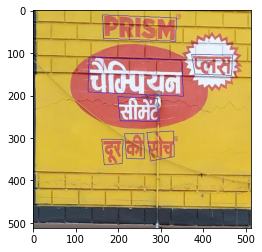

In [80]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/images_pred/1_3.jpg')

imgplot = plt.imshow(img)
plt.show()